In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

sys.path.append('../')

from plot import backtest_plot

/Users/neerajchhimwal/.pyenv/versions/3.8.6/lib/python3.8/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import empyrical as ep

In [5]:
%matplotlib inline

In [ ]:
# wandb run name: true_sun_32

In [4]:
results_dir = '../results_lr_schedule_grad_clip_critic_n_actor_2016_2020_may/'

In [5]:
os.listdir(results_dir)

['return_comparison_episode_0.csv',
 'return_comparison_episode_40.csv',
 'daily_actions_test_episode_40.csv',
 'return_comparison_episode_20.csv',
 'daily_actions_test_episode_30.csv',
 'account_value_test_episode_10.csv',
 'daily_actions_test_episode_20.csv',
 'return_comparison_episode_30.csv',
 'daily_actions_test_episode_10.csv',
 'account_value_test_episode_30.csv',
 'account_value_test_episode_20.csv',
 'daily_actions_test_episode_0.csv',
 'return_comparison_episode_10.csv',
 'account_value_test_episode_0.csv',
 'account_value_test_episode_40.csv']

In [6]:
ac_value_agent = 'account_value_test_episode_30.csv'

In [7]:
df_account_value = pd.read_csv(os.path.join(results_dir, ac_value_agent), index_col='Unnamed: 0')
df_account_value

,date,account_value
0,2016-01-04,1.000000e+06
1,2016-01-05,9.999329e+05
2,2016-01-06,9.978216e+05
3,2016-01-07,9.932495e+05
4,2016-01-08,9.901278e+05
...,...,...
1088,2020-04-30,1.599590e+06
1089,2020-05-01,1.563307e+06
1090,2020-05-04,1.564141e+06
1091,2020-05-05,1.573794e+06


In [8]:
df_account_value.loc[0,'date']

'2016-01-04'

In [9]:
df_account_value.loc[len(df_account_value)-1,'date']

'2020-05-06'

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1092, 8)


Start date,2016-01-04
End date,2020-05-06
Total months,52
,Backtest
Annual return,10.821%
Cumulative returns,56.151%
Annual volatility,13.871%
Sharpe ratio,0.81
Calmar ratio,0.57
Stability,0.93
Max drawdown,-18.925%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,18.93,2020-01-17,2020-04-01,NaT,NaN
1,15.01,2018-09-21,2018-12-24,2019-04-12,146
2,11.35,2018-01-26,2018-03-23,2018-08-27,152
3,6.49,2016-09-22,2016-11-04,2016-12-09,57
4,5.22,2016-04-20,2016-06-27,2016-07-08,58


Stress Events,mean,min,max
New Normal,0.04%,-6.35%,5.30%


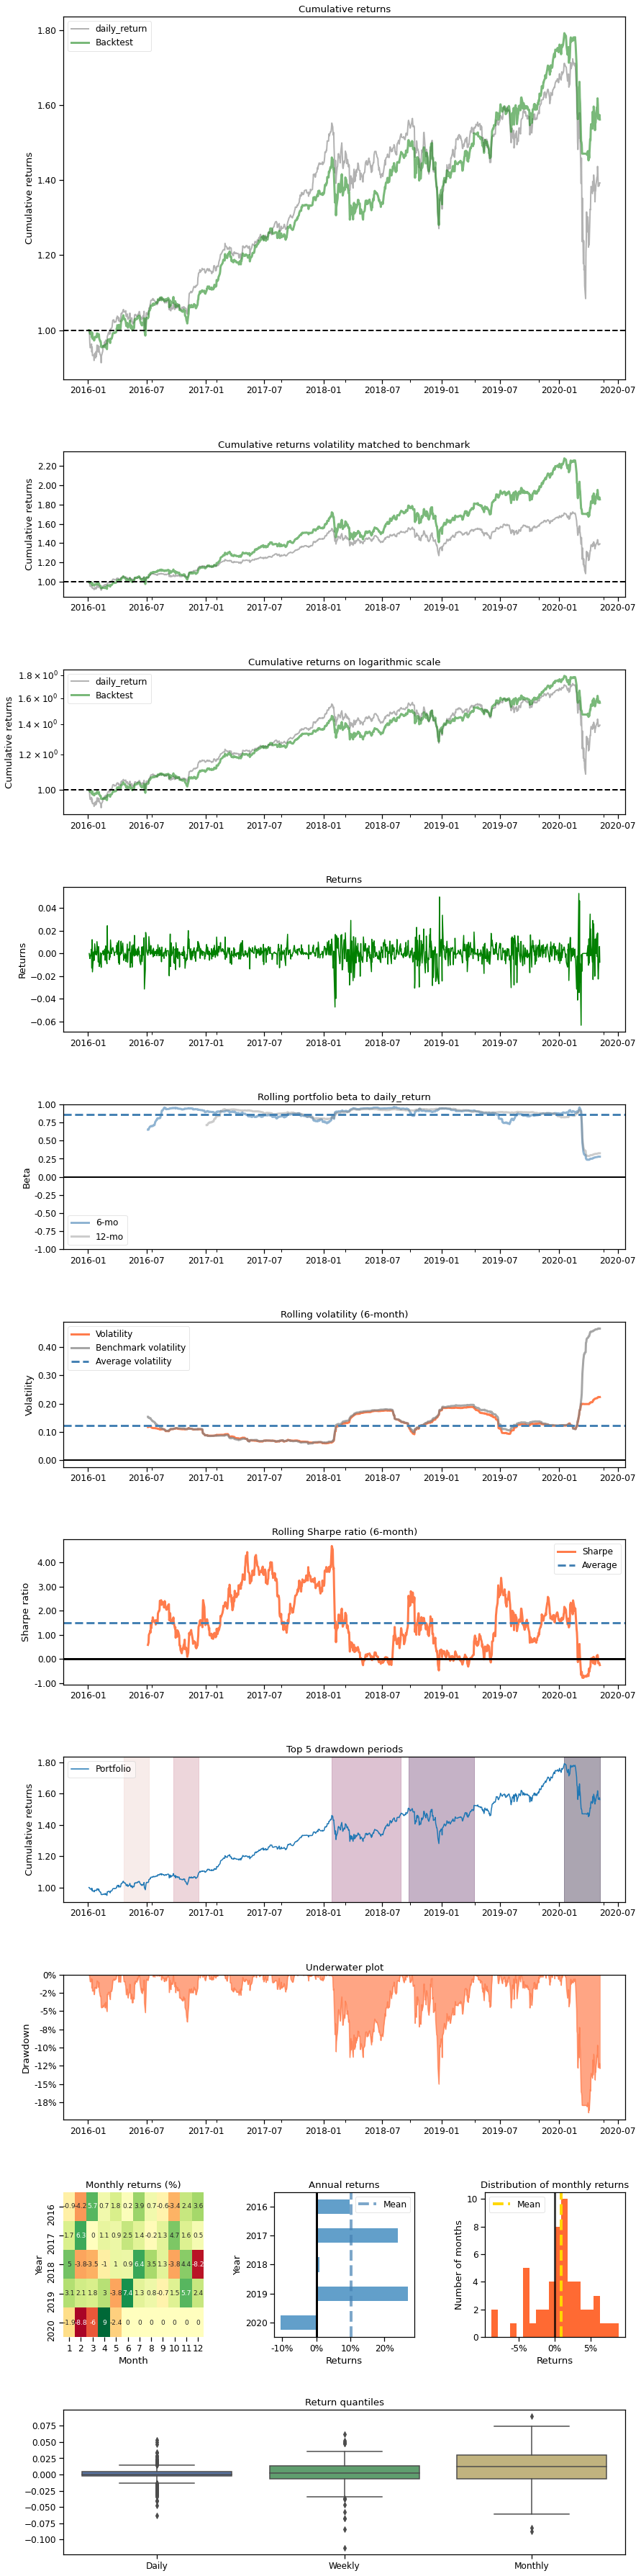

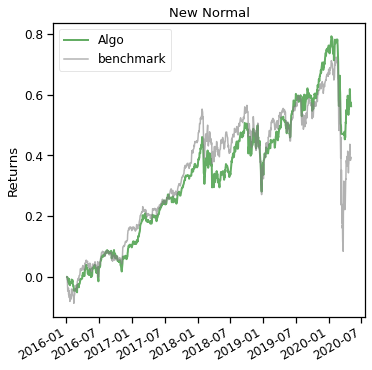

In [10]:
test_returns, baseline_returns = backtest_plot(df_account_value, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value.loc[0,'date'],
                                                 baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])

In [11]:
def process_df(daily_returns_series):
    returns_df = pd.DataFrame(daily_returns_series) # index will be date here
    returns_df.reset_index(inplace=True)
    returns_df = returns_df.rename(columns = {'index':'date'})
    returns_df['date'] = [str(i).split()[0] for i in returns_df['date']]
    returns_df['date'] = pd.to_datetime(returns_df['date'], format='%Y-%m-%d')
    
    return returns_df

In [12]:
agent_returns = process_df(test_returns)
dji_returns = process_df(baseline_returns)

In [14]:
agent_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1093 non-null   datetime64[ns]
 1   daily_return  1092 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [15]:
dji_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1093 non-null   datetime64[ns]
 1   daily_return  1092 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [16]:
agent_returns

,date,daily_return
0,2016-01-04,NaN
1,2016-01-05,-0.000067
2,2016-01-06,-0.002111
3,2016-01-07,-0.004582
4,2016-01-08,-0.003143
...,...,...
1088,2020-04-30,-0.011383
1089,2020-05-01,-0.022682
1090,2020-05-04,0.000533
1091,2020-05-05,0.006172


In [17]:
dji_returns

,date,daily_return
0,2016-01-04,NaN
1,2016-01-05,0.000567
2,2016-01-06,-0.014695
3,2016-01-07,-0.023211
4,2016-01-08,-0.010152
...,...,...
1088,2020-04-30,-0.011697
1089,2020-05-01,-0.025550
1090,2020-05-04,0.001099
1091,2020-05-05,0.005614


In [20]:
sample = pd.DataFrame(test_returns)

In [21]:
sample

,daily_return
date,
2016-01-04 00:00:00+00:00,NaN
2016-01-05 00:00:00+00:00,-0.000067
2016-01-06 00:00:00+00:00,-0.002111
2016-01-07 00:00:00+00:00,-0.004582
2016-01-08 00:00:00+00:00,-0.003143
...,...
2020-04-30 00:00:00+00:00,-0.011383
2020-05-01 00:00:00+00:00,-0.022682
2020-05-04 00:00:00+00:00,0.000533


<AxesSubplot:xlabel='date'>

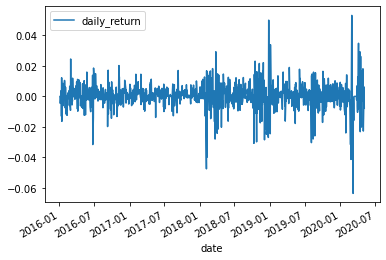

In [28]:
cum_rets = ep.cum_returns(test_returns, 0.0)
cum_rets_dji = ep.cum_returns(baseline_returns, 0.0)

In [29]:
cum_rets

date
2016-01-04 00:00:00+00:00    0.000000
2016-01-05 00:00:00+00:00   -0.000067
2016-01-06 00:00:00+00:00   -0.002178
2016-01-07 00:00:00+00:00   -0.006750
2016-01-08 00:00:00+00:00   -0.009872
                               ...   
2020-04-30 00:00:00+00:00    0.599590
2020-05-01 00:00:00+00:00    0.563307
2020-05-04 00:00:00+00:00    0.564141
2020-05-05 00:00:00+00:00    0.573794
2020-05-06 00:00:00+00:00    0.561508
Length: 1093, dtype: float64

In [30]:
cum_rets_dji

date
2016-01-04 00:00:00+00:00    0.000000
2016-01-05 00:00:00+00:00    0.000567
2016-01-06 00:00:00+00:00   -0.014137
2016-01-07 00:00:00+00:00   -0.037019
2016-01-08 00:00:00+00:00   -0.046795
                               ...   
2020-04-30 00:00:00+00:00    0.419663
2020-05-01 00:00:00+00:00    0.383391
2020-05-04 00:00:00+00:00    0.384911
2020-05-05 00:00:00+00:00    0.392686
2020-05-06 00:00:00+00:00    0.392686
Length: 1093, dtype: float64

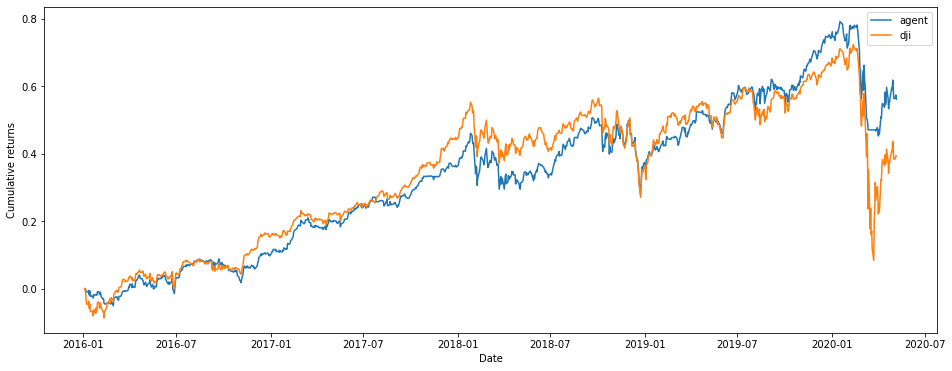

In [52]:
plt.figure(figsize=(16,6))
plt.plot(cum_rets)
plt.plot(cum_rets_dji)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.savefig('Cumulative returns plot agent vs dji.png', dpi=600)

In [45]:
# for e40

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1092, 8)


Start date,2016-01-04
End date,2020-05-06
Total months,52
,Backtest
Annual return,10.582%
Cumulative returns,54.694%
Annual volatility,13.945%
Sharpe ratio,0.79
Calmar ratio,0.55
Stability,0.93
Max drawdown,-19.298%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,19.30,2020-01-17,2020-04-01,NaT,NaN
1,14.47,2018-09-21,2018-12-24,2019-04-12,146
2,12.83,2018-01-26,2018-05-03,2018-09-20,170
3,6.79,2016-09-22,2016-11-04,2016-12-09,57
4,5.76,2016-04-20,2016-06-27,2016-07-08,58


Stress Events,mean,min,max
New Normal,0.04%,-6.57%,5.41%


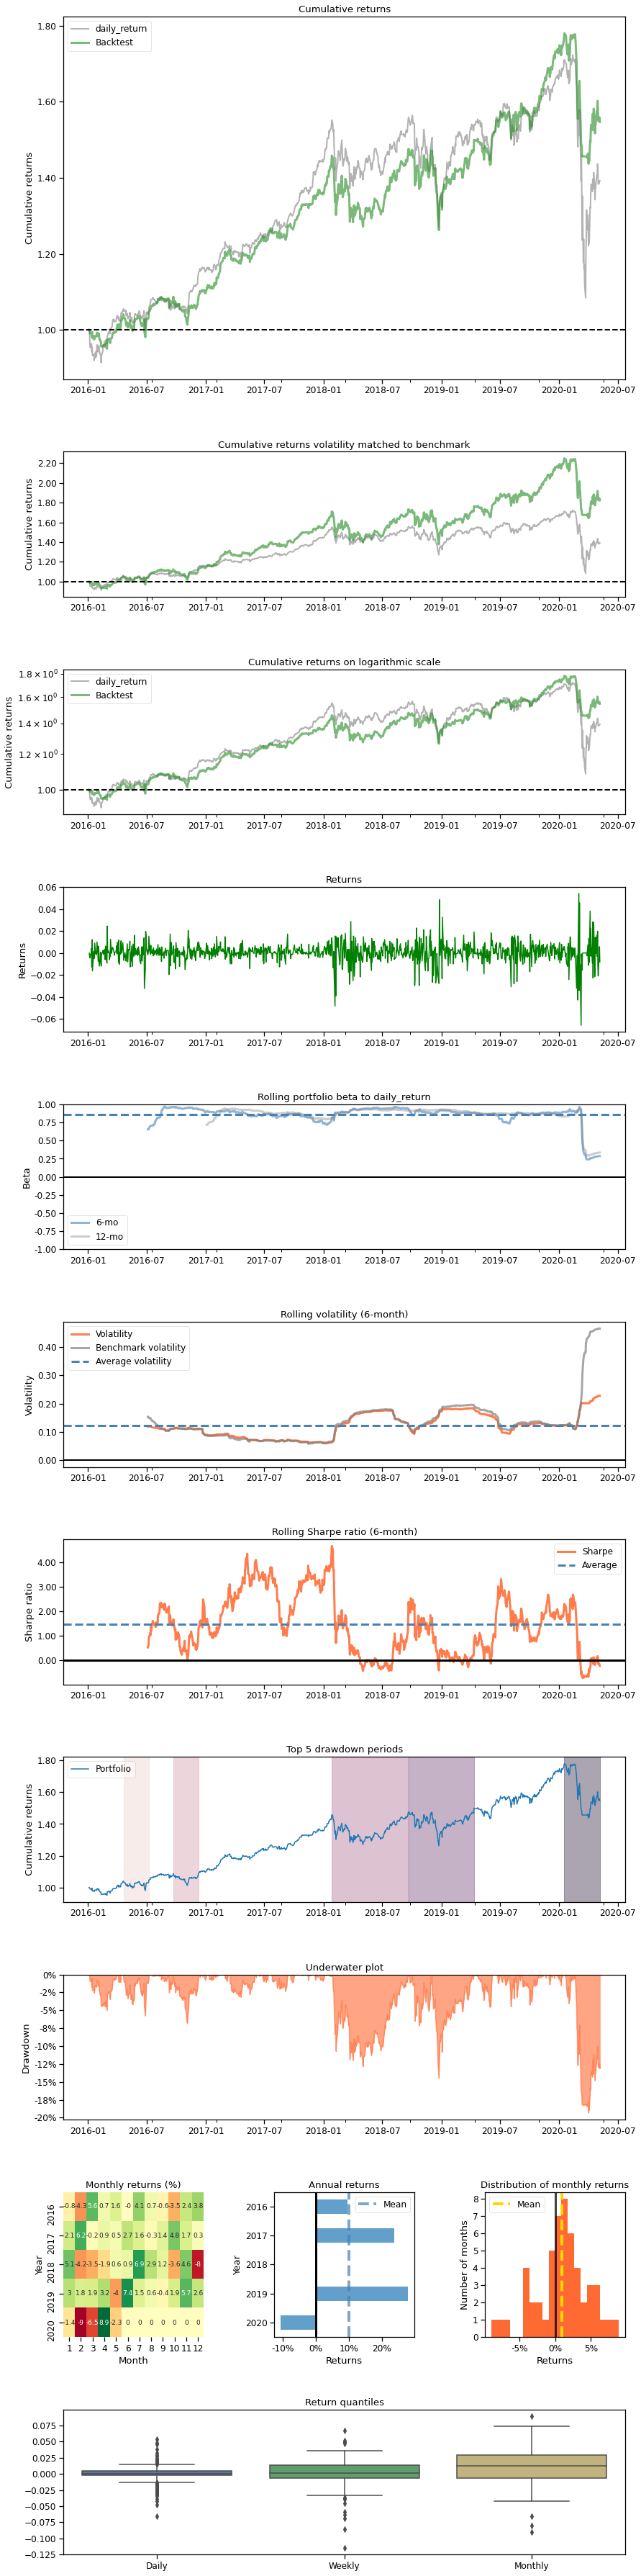

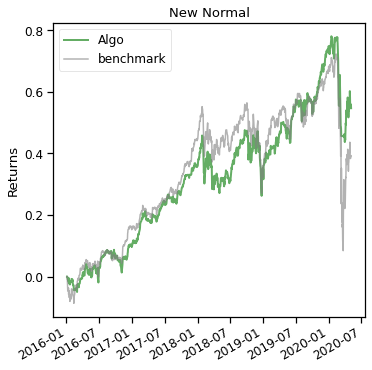

In [47]:
ac_value_agent_ = 'account_value_test_episode_40.csv'
df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_agent_), index_col='Unnamed: 0')

test_returns_, baseline_returns_ = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.loc[0,'date'],
                                                 baseline_end = df_account_value_.loc[len(df_account_value_)-1,'date'])


cum_rets_ = ep.cum_returns(test_returns_, 0.0)
cum_rets_dji_ = ep.cum_returns(baseline_returns_, 0.0)

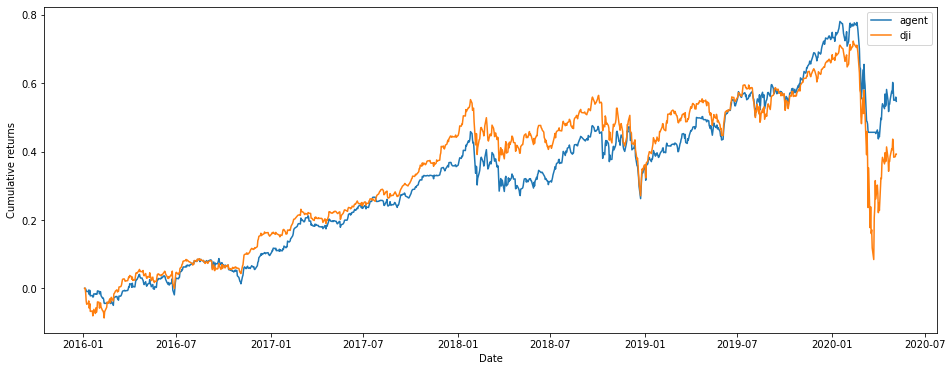

In [48]:
plt.figure(figsize=(16,6))
plt.plot(cum_rets_)
plt.plot(cum_rets_dji_)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.show()

In [7]:
#wandb run name: dauntless dust
results_dir = '../results_lr_schedule_step_10_grad_clip_small_nw_400_400_2016_2022_may'

In [9]:
ac_value_csv_last_ep = 'account_value_test_episode_70.csv'

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1092, 8)


Start date,2016-01-04
End date,2020-05-06
Total months,52
,Backtest
Annual return,9.72%
Cumulative returns,49.532%
Annual volatility,14.913%
Sharpe ratio,0.70
Calmar ratio,0.47
Stability,0.87
Max drawdown,-20.856%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,20.86,2020-01-17,2020-04-01,NaT,NaN
1,17.26,2018-01-29,2018-12-24,2019-06-28,370
2,7.57,2016-04-20,2016-06-27,2016-07-13,61
3,6.81,2016-01-04,2016-02-23,2016-04-01,65
4,5.78,2016-09-22,2016-11-04,2016-11-10,36


Stress Events,mean,min,max
New Normal,0.04%,-6.84%,5.39%


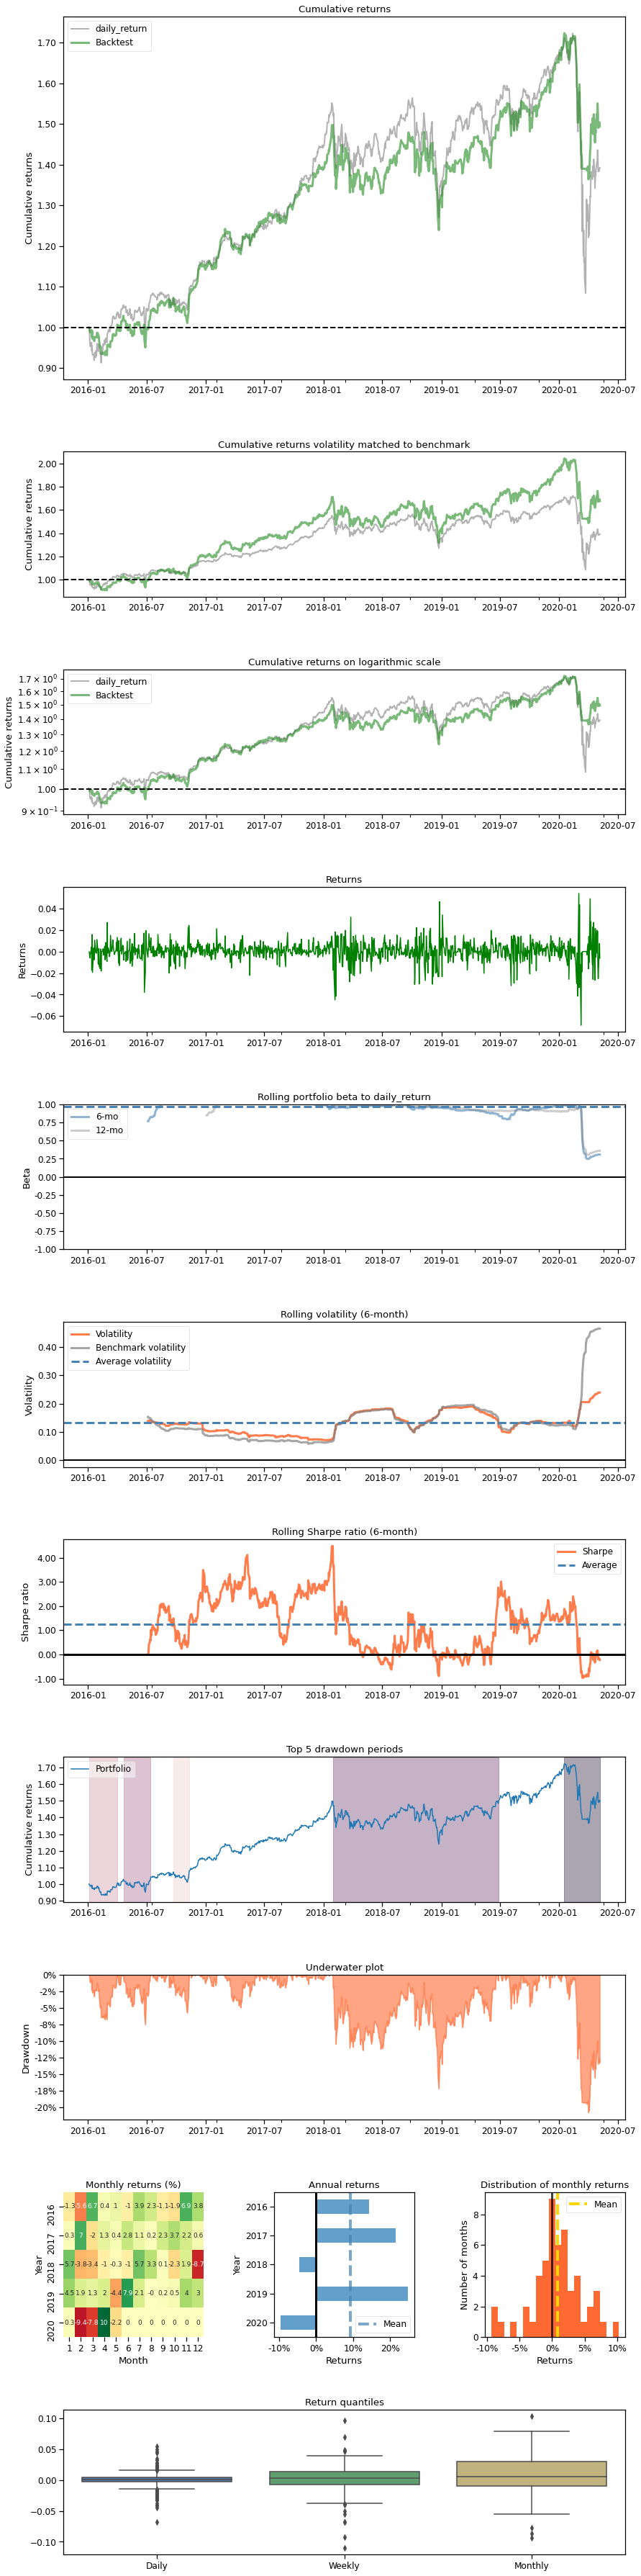

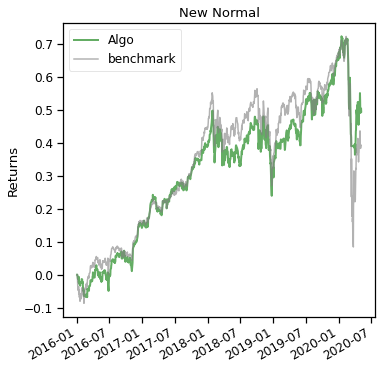

In [10]:
df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')

test_returns_, baseline_returns_ = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.loc[0,'date'],
                                                 baseline_end = df_account_value_.loc[len(df_account_value_)-1,'date'])


cum_rets_ = ep.cum_returns(test_returns_, 0.0)
cum_rets_dji_ = ep.cum_returns(baseline_returns_, 0.0)

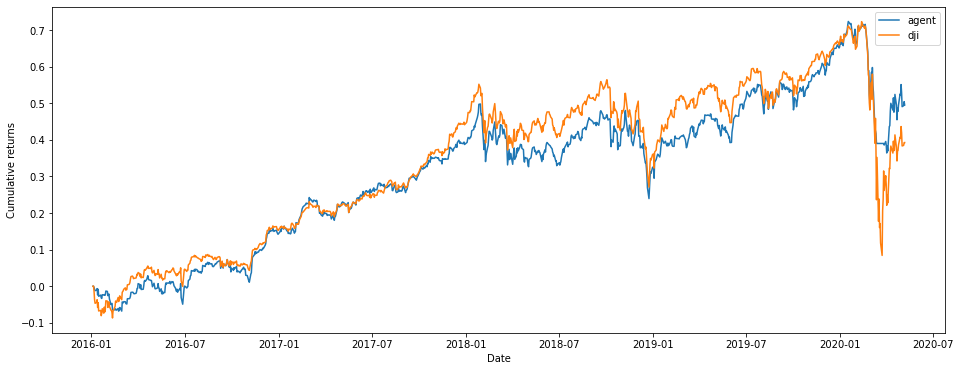

In [16]:
plt.figure(figsize=(16,6))
plt.plot(cum_rets_)
plt.plot(cum_rets_dji_)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.savefig('Cumulative returns after nw convergence [dauntless dust] plot agent vs dji.png', dpi=600)

In [7]:
#wandb run name: avid wave
results_dir = '../results_with_noise_reset_every_episode'

In [9]:
ac_value_csv_last_ep = 'account_value_test_episode_40.csv'

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1092, 8)


Start date,2016-01-04
End date,2020-05-06
Total months,52
,Backtest
Annual return,9.721%
Cumulative returns,49.536%
Annual volatility,15.046%
Sharpe ratio,0.69
Calmar ratio,0.45
Stability,0.87
Max drawdown,-21.512%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,21.51,2020-01-17,2020-04-01,NaT,NaN
1,16.92,2018-01-29,2018-12-24,2019-07-01,371
2,7.90,2016-04-20,2016-06-27,2016-07-14,62
3,6.90,2016-01-04,2016-02-23,2016-04-01,65
4,5.79,2016-09-22,2016-11-04,2016-11-10,36


Stress Events,mean,min,max
New Normal,0.04%,-7.03%,5.52%


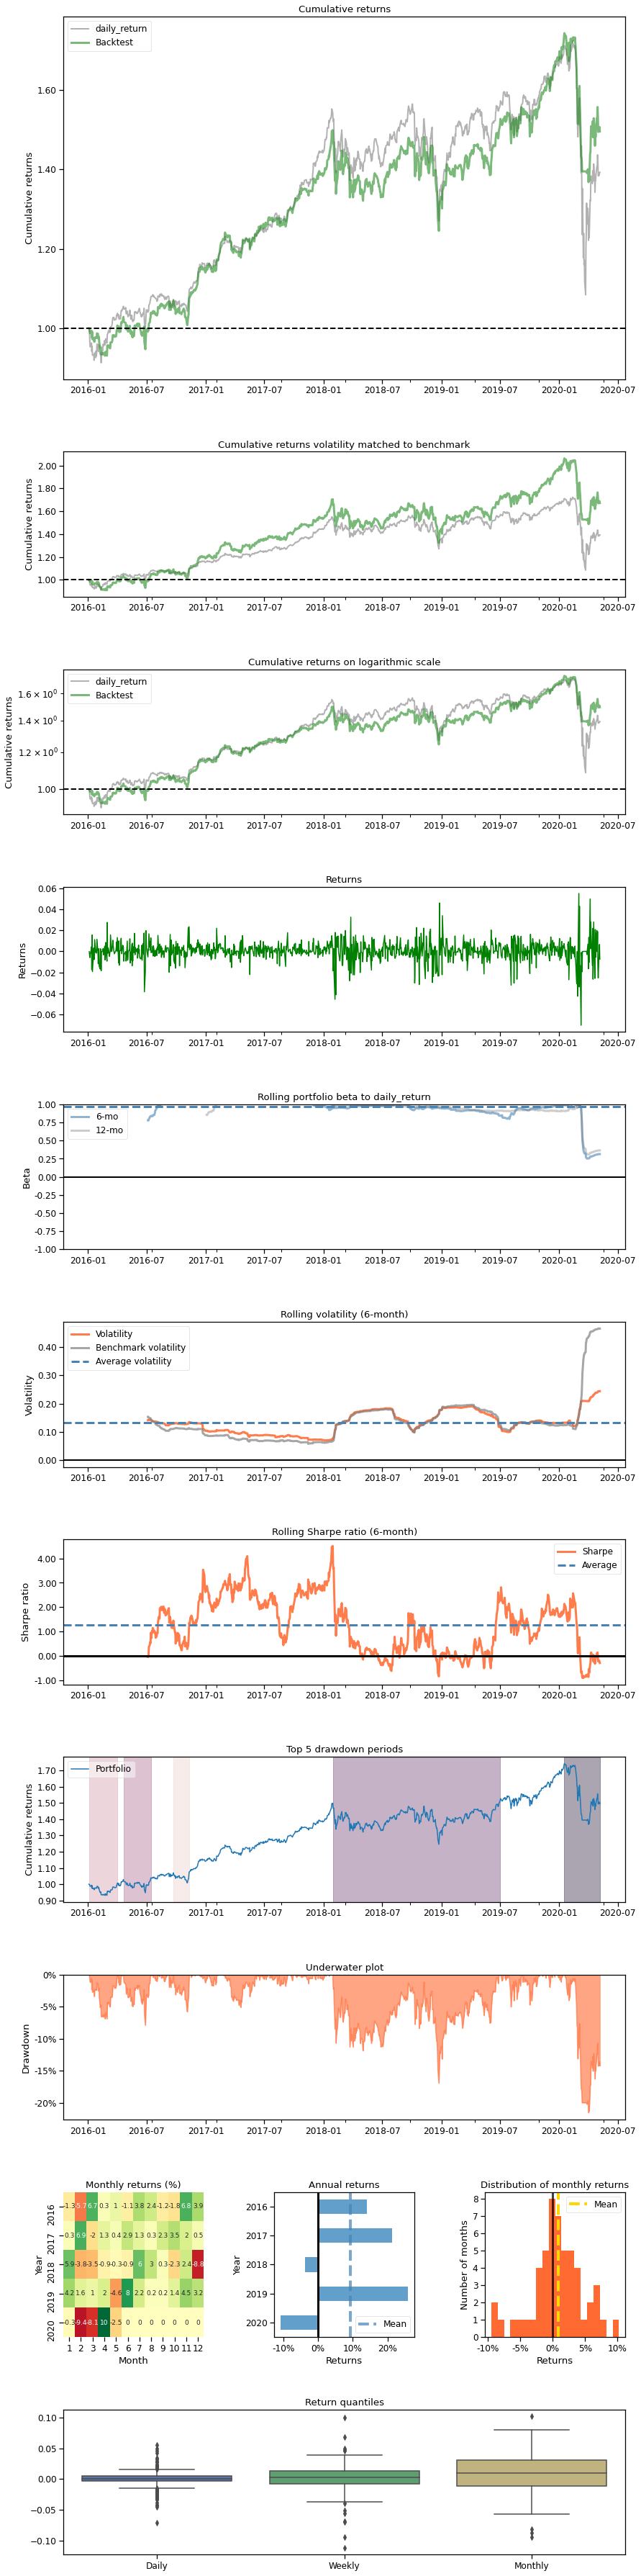

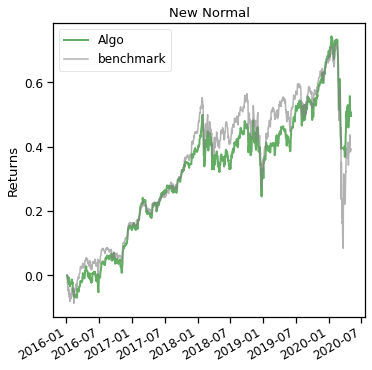

In [10]:
df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')

test_returns_, baseline_returns_ = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.loc[0,'date'],
                                                 baseline_end = df_account_value_.loc[len(df_account_value_)-1,'date'])


cum_rets_ = ep.cum_returns(test_returns_, 0.0)
cum_rets_dji_ = ep.cum_returns(baseline_returns_, 0.0)

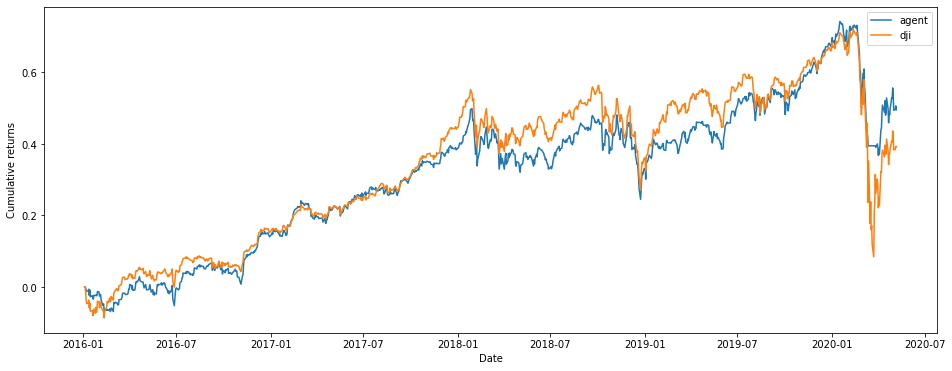

In [11]:
plt.figure(figsize=(16,6))
plt.plot(cum_rets_)
plt.plot(cum_rets_dji_)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.savefig('Cumulative returns after nw convergence [avid wave] plot agent vs dji.png', dpi=600)

## Using tuned hyperparams on DDPG agent

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1094, 8)


Start date,2016-01-04
End date,2020-05-08
Total months,52
,Backtest
Annual return,15.268%
Cumulative returns,85.416%
Annual volatility,14.37%
Sharpe ratio,1.06
Calmar ratio,0.93
Stability,0.95
Max drawdown,-16.494%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,16.49,2020-02-19,2020-04-03,NaT,NaN
1,15.63,2018-12-03,2018-12-24,2019-07-11,159
2,12.95,2018-01-29,2018-03-23,2018-08-07,137
3,7.26,2016-08-15,2016-11-04,2016-11-29,77
4,6.08,2019-08-13,2019-10-02,2019-10-30,57


Stress Events,mean,min,max
New Normal,0.06%,-5.62%,6.07%


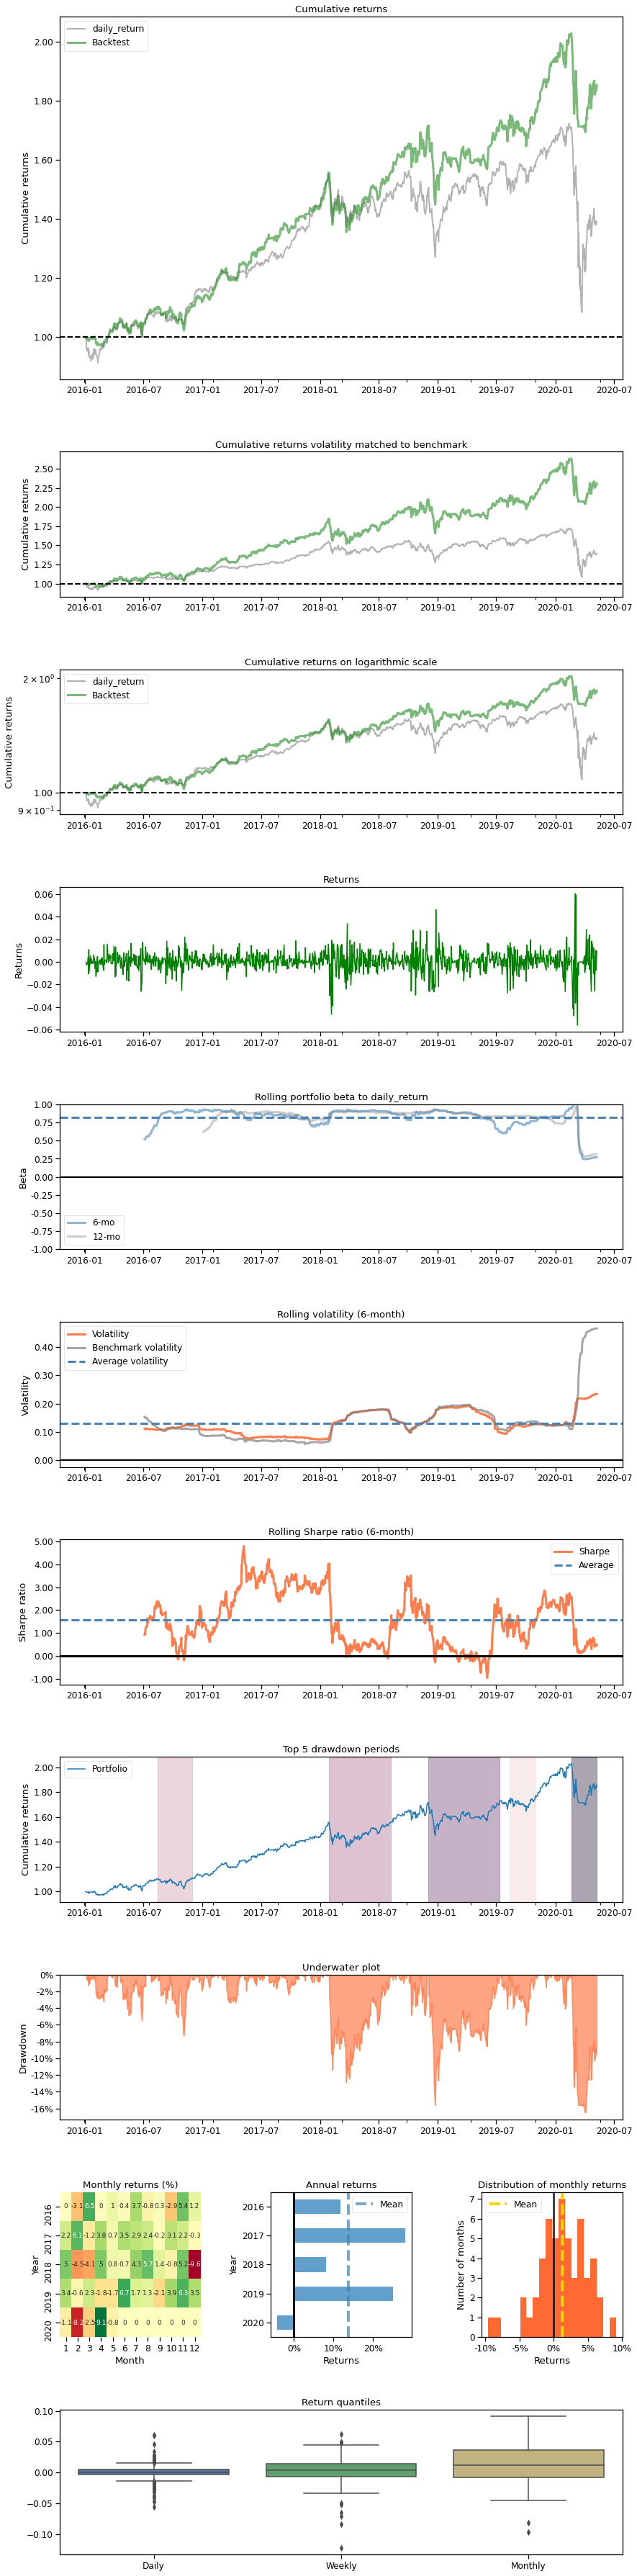

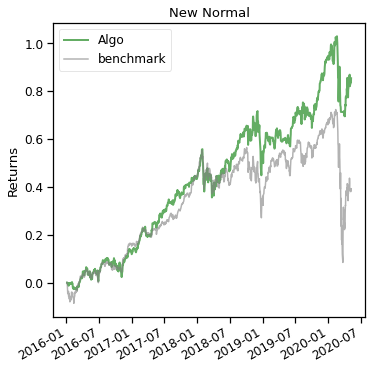

In [6]:
'''
config: 

'buffer_size': 100000, 
'learning_rate': 0.04984525010608113, 
'batch_size': 128, 
'net_arch': 'small' [64, 64]
'''
results_dir = '../tuning'
ac_value_csv_last_ep = 'account_value_test_tuning.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')

test_returns_, baseline_returns_ = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.loc[0,'date'],
                                                 baseline_end = df_account_value_.loc[len(df_account_value_)-1,'date'])


cum_rets_ = ep.cum_returns(test_returns_, 0.0)
cum_rets_dji_ = ep.cum_returns(baseline_returns_, 0.0)

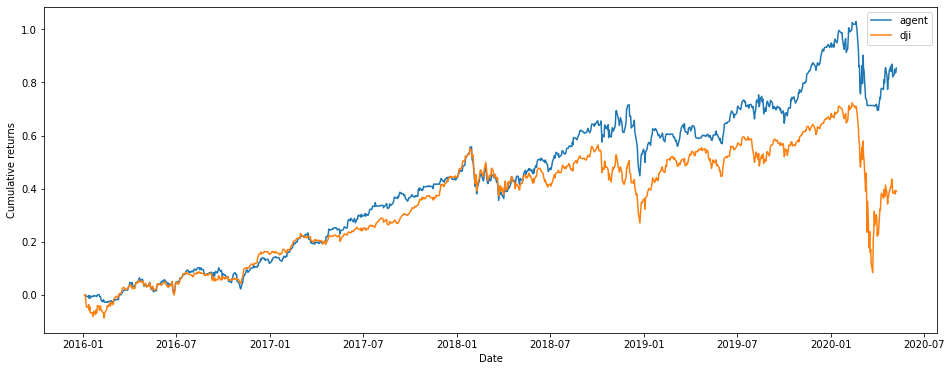

In [7]:
plt.figure(figsize=(16,6))
plt.plot(cum_rets_)
plt.plot(cum_rets_dji_)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.savefig('Cumulative returns tuned agent.png', dpi=600)

### Noise analysis

In [17]:
n_actions = 29
sigma = 0.15 
theta = 0.2 
dt = 1e-2

In [37]:
class OUActionNoise(object):
    '''
    implements noise to model the physics of a running particle,
        "random normal noise correlated in time"

    this will be added in the actor class to add some exploration noise
    '''
    def __init__(self, mu, sigma=sigma, theta=theta, dt=dt, x0=None):
        self.theta = theta
        self.mu = mu
        self.sigma = sigma
        self.dt = dt
        self.x0 = x0
        self.reset() # resets the temporal correlation

    def __call__(self):
        '''
        Dunder mothod that allows you to create object like this:
                            noise = OUActionNoise()
                            noise() 
        instead of noise.get_noise() or something similar
        '''
        print(self.x_prev)
        x = self.x_prev + self.theta * (self.mu - self.x_prev) * self.dt + \
            self.sigma * np.sqrt(self.dt) * np.random.normal(size=self.mu.shape)
        self.x_prev = x
        return x

    def reset(self):
        self.x_prev = self.x0 if self.x0 is not None else np.zeros_like(self.mu)
#         return self.x_prev

In [48]:
noise = OUActionNoise(mu=np.zeros(n_actions))

In [49]:
noise()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


array([ 2.89978892e-03, -4.01005145e-03, -2.13744611e-02, -2.33463528e-02,
       -2.57210839e-02,  6.57272340e-04,  1.34768530e-02, -6.03667809e-03,
       -2.23302204e-02, -1.67365587e-02,  1.21704955e-02,  5.35397972e-03,
       -7.82285197e-03,  3.97489893e-03,  2.18715025e-03,  1.12758518e-02,
        2.10456106e-02, -2.47200987e-02, -3.56196636e-03,  1.89484496e-03,
       -1.36703625e-02,  2.06697955e-05, -2.85975189e-02, -3.28820341e-02,
       -2.73045890e-03,  2.44035465e-03,  4.01765830e-03,  1.93612555e-02,
        2.36194108e-02])

In [51]:
noise.reset()

In [52]:
noise()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


array([-0.01145287, -0.01418463,  0.01372322, -0.00455423,  0.01114075,
       -0.00142772,  0.00329803, -0.01122842,  0.01375956,  0.01663907,
       -0.02850555, -0.01576258, -0.01020768, -0.00641581, -0.0202676 ,
       -0.00705225, -0.00930554,  0.00240402, -0.00573029,  0.00189701,
        0.02540059, -0.01810731,  0.02359647,  0.00773245, -0.0047905 ,
        0.01903848,  0.02576183, -0.01788066,  0.00187862])

In [47]:
noise()

[ 0.02245302  0.02437007 -0.0321691  -0.00146815 -0.0205409   0.02319381
  0.01275632  0.01845725 -0.02651601 -0.02630194  0.0182469  -0.03008778
  0.01542432 -0.01213922 -0.00229937  0.00664326 -0.0158762  -0.01473752
 -0.00050659 -0.00069182  0.01376812  0.01551612  0.03821303  0.01613634
  0.00406359 -0.0326106  -0.02715399 -0.0111317   0.02567524]


array([ 0.00311584,  0.03091703, -0.01614189, -0.01918707, -0.01782649,
        0.01448332,  0.00587509, -0.02473375, -0.02913846, -0.01165315,
        0.0006922 , -0.02924453,  0.04052884, -0.001904  , -0.02169299,
        0.00624732,  0.01339307, -0.05171572, -0.00014438,  0.0266135 ,
        0.03798479,  0.02822089,  0.03946671,  0.00858213,  0.00518981,
       -0.04071646, -0.01143807,  0.00618593,  0.03002344])